In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [ ]:
pip install yfinance

In [3]:
import yfinance as yf

In [4]:
yf.pdr_override()

In [ ]:
PG = wb.DataReader('PG',data_source='yahoo',start='1995-01-01')

In [ ]:
PG.head()

In [ ]:
PG.tail()

#Simple Return 

\use shift() function to get previous periods price



In [ ]:
PG['Simple Return']= (PG['Adj Close']/PG['Adj Close'].shift(1))-1
print (PG['Simple Return'])

In [9]:
avg_return_PG= PG['Simple Return'].mean()*250

//multiplid by 250 because there is 250 trading days in a year//

In [10]:
avg_return_PG

0.13035893185544237

In [11]:
print(str(round(avg_return_PG,4)*100)+'%')

13.04%


In [ ]:
PG.head()

#Log Return

\\Use log return when you make calculation for sigle asset over time

In [13]:
PG['log Return']= np.log(PG['Adj Close']/PG['Adj Close'].shift(1))


In [ ]:
print(PG['log Return'])

In [ ]:
PG

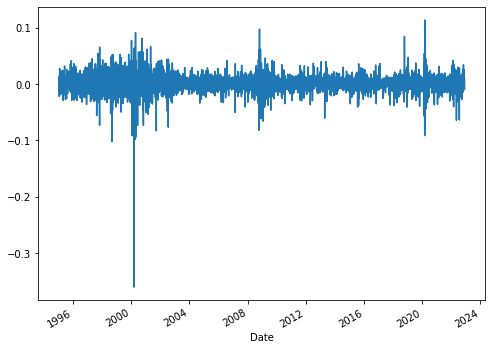

In [16]:
PG['log Return'].plot(figsize =(8,6))
plt.show()

In [17]:
Avg_log_Return = PG['log Return'].mean()*250
Avg_log_Return

0.10529958636108794

In [18]:
print(str(round(Avg_log_Return,4)*100)+'%')

10.530000000000001%


#Calculating a portfolio of securities rate of Return

In [ ]:
tickers = ['PG','MSFT','F','GE']
portfolio = pd.DataFrame()
for t in tickers:
  portfolio[t] = wb.DataReader(t,data_source='yahoo',start='1995-01-01')['Adj Close']

In [ ]:
portfolio.tail(20)

In [ ]:
portfolio.info()

Normalization to 100

//Data sould be normalized because if not then the starting point of each line would be different and comparision would be biased

In [ ]:
portfolio.iloc[0]

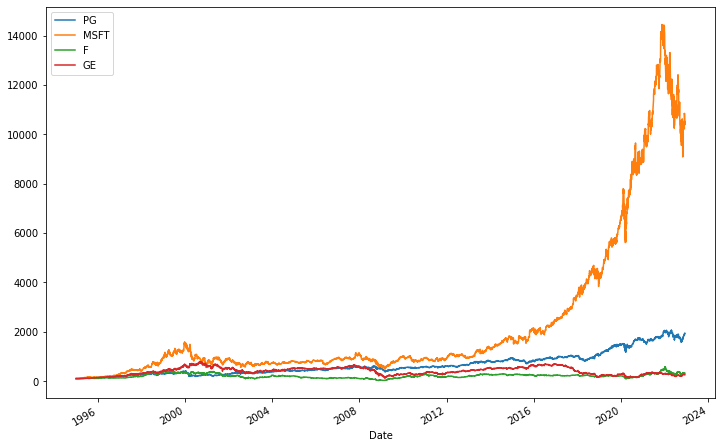

In [23]:
(portfolio/portfolio.iloc[0] *100).plot(figsize= (12,8))
plt.show()

In [ ]:
Portfolio_return = (portfolio/portfolio.shift(1))-1
Portfolio_return

// we use simple return because we are dealing with multiple securities

In [25]:
weights = np.array([.25,.25,.25,.25])

// Now we need to multiply returns with weights of the corresponding securities. // np.dot() function will be used here. 

In [26]:
np.dot(Portfolio_return,weights)

array([        nan,  0.00653987, -0.00922984, ..., -0.00479497,
       -0.00336657,  0.00124918])

In [27]:
annual_port_return = Portfolio_return.mean()*250

In [28]:
np.dot(annual_port_return,weights)

0.13790694840264192

In [29]:
port_1= str(round(np.dot(annual_port_return,weights),5)*100)+' %'
print(port_1)

13.791 %


In [30]:
weight_2= np.array([0.4,0.4,0.15,0.05])

In [31]:
port_2 = str(round(np.dot(annual_port_return,weight_2),5)*100)+' %'
port_2

'16.057 %'

In [32]:
print(port_1)
print(port_2)

13.791 %
16.057 %


#Calculating Rate of Return of Indices

In [40]:
tickers_ind = ['^GSPC','^IXIC','^GDAXI','^FTSE']
ind_data = pd.DataFrame()
for t in tickers_ind:
  ind_data[t] = wb.DataReader(t,data_source='yahoo',start='1997-01-01')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
ind_data.tail(20)

In [ ]:
ind_data.head()

Normalization

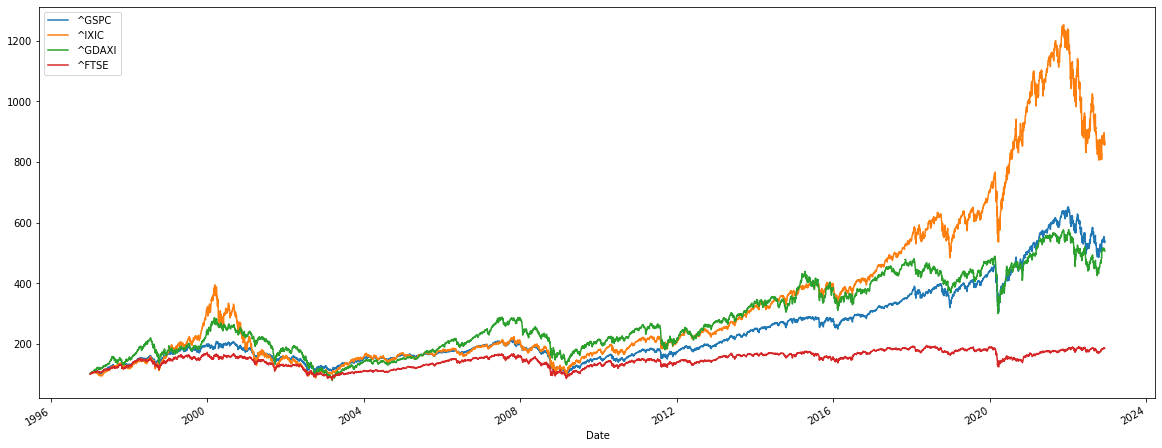

In [48]:
(ind_data/ind_data.iloc[0]*100).plot(figsize=(20, 8))
plt.show()

In [ ]:
ind_return = (ind_data/ind_data.shift(1))-1
ind_return

In [53]:
annual_ind_return = ind_return.mean()*250
annual_ind_return

^GSPC     0.083806
^IXIC     0.114542
^GDAXI    0.074899
^FTSE     0.038042
dtype: float64

let's compare a stock performance with indices

In [55]:
tickers_c = ['META','GOOGL','^IXIC']
data_c = pd.DataFrame()
for c in tickers_c:
  data_c[c]= wb.DataReader(c,data_source='yahoo',start='2001-01-01')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [56]:
data_c.tail()

,META,GOOGL,^IXIC
Date,,,
2022-12-02,123.489998,100.440002,11461.500000
2022-12-05,122.430000,99.480003,11239.940430
2022-12-06,114.120003,96.980003,11014.889648
2022-12-07,113.930000,94.940002,10958.549805
2022-12-08,115.330002,93.709999,11082.000000


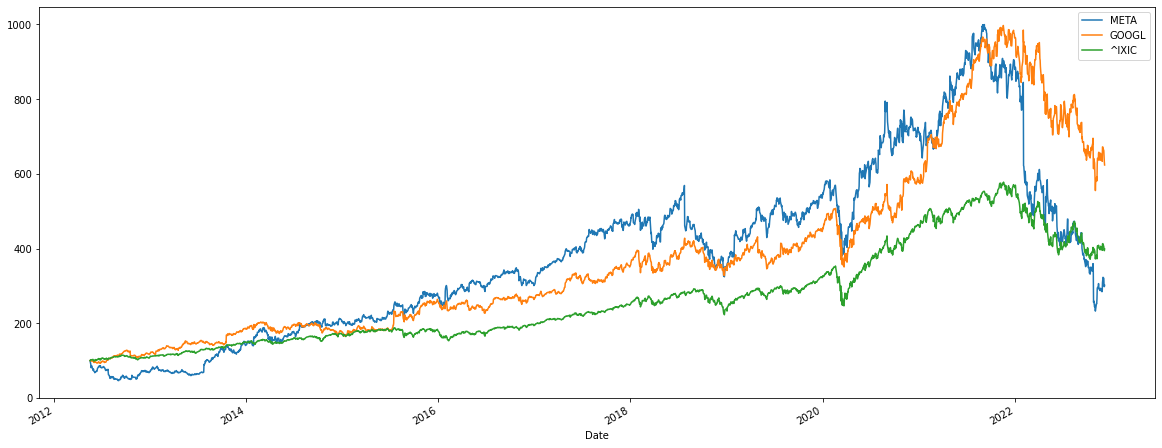

In [57]:
(data_c/data_c.iloc[0]*100).plot(figsize=(20,8))
plt.show()